# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 994.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 14.0 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=b0fb58ccbc18163b19d3e30fea7676c9d52aa66863e91ed04ce3a1e5d999ab52
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 87.9 MB/s eta 0:00:0000:0100:01
  Using cached certifi-2025.11.12-py3-none-any.whl (159 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 118.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 38.0 MB/s eta 0:00:00


## 1. Gather data

### **1.1.** Problem Statement


In this project, I aim to explore how the financial performance of movies, specifically budget and revenue, differs depending on whether the title is available on Netflix. To investigate this, I will gather and wrangle two related datasets: The Movies Dataset from Kaggle, which contains extensive movie-level metadata, and the Netflix Movies and TV Shows Dataset, which lists titles currently available on Netflix. These datasets will allow me to merge streaming availability with financial metrics and analyze whether Netflix selected films tend to have different budget or revenue characteristics.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

# Dataset 1 (Manual download):
- Name: movies_metadata.csv (Kaggle: The Movies Dataset)
- Type: CSV
- Method: Manual download from Kaggle website and saved to project folder.
- Key variables: title, release_date, budget, revenue, genres

In [3]:
!kaggle datasets download -d /Julian/movies-dataset -f movies_metadata.csv

/usr/bin/sh: 1: kaggle: not found


## Dataset 2 (Programmatic):
- Name: netflix_titles.csv (Kaggle: Netflix Movies and TV Shows)
- Type: CSV
- Method: Programmatic download using Kaggle API (snippet below)
- Key variables: title, type, release_year, listed_in

In [4]:
!kaggle datasets download -d /Julian/netflix -f netflix_titles.csv

/usr/bin/sh: 1: kaggle: not found


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# For reproducibility / nicer plots
plt.rcParams['figure.figsize'] = (9, 5)

movies = pd.read_csv('movies_metadata.csv', low_memory=False)
netflix = pd.read_csv('netflix_titles.csv')

### Quality Issue 1:

In [6]:
movies[['budget', 'revenue']].head()

,budget,revenue
0,30000000,373554033.0
1,65000000,262797249.0
2,0,0.0
3,16000000,81452156.0
4,0,76578911.0


In [7]:
movies[['budget', 'revenue']].describe()
movies[['budget', 'revenue']].isna().sum()
(movies['budget'] == 0).sum()
(movies['revenue'] == 0).sum()


38052

 The Movies Dataset contains many missing or invalid values in critical numeric fields such as budget and revenue. A large portion of rows show values of 0, which is not realistic, and numerous rows have NaN values in these columns. This directly affects any analysis involving financial performance.
 
 Justification:
Because the research question compares budgets and revenues between Netflix and non Netflix movies, inaccurate or missing financial values would distort the results, making cleaning necessary.

### Quality Issue 2:

In [8]:
movies['release_date'].sample(10)

22700    1999-01-01
41388    2012-09-23
13947    1943-12-24
41642    2016-12-16
1453     1996-09-09
31801    2009-10-17
38110    2006-03-12
24554    1999-02-04
4651     2001-09-07
35059    2006-01-01
Name: release_date, dtype: object

In [9]:
movies['release_date'].isna().sum()
pd.to_datetime(movies['release_date'], errors='coerce').isna().sum()

90

The release_date field contains invalid values and inconsistent formatting. Some dates are missing entirely, and others fail to convert to datetime (2018-13-40). These issues prevent chronological sorting and block transformations like extracting year or comparing release timing.
 
Justification:
Since merging with the Netflix dataset may rely partially on year matching, invalid dates will interfere with joining and time-based comparisons 

### Tidiness Issue 1:

In [10]:
movies['genres'].head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [11]:
movies['genres'].apply(type).value_counts()

genres
<class 'str'>    45466
Name: count, dtype: int64

Columns such as genres, production_companies, keywords, and spoken_languages contain JSON-like lists in a single cell. This violates the tidy data principle that “each variable forms one column.” The nested structure prevents straightforward filtering or analysis.

Justification:
To analyze or merge genres or production companies cleanly, these columns must be normalized or converted into usable formats.

### Tidiness Issue 2: 

In [12]:
netflix['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [13]:
netflix.groupby('type').size()
netflix[['type', 'title']].sample(5)

,type,title
3411,Movie,Up North
8054,Movie,Some Freaks
940,Movie,Motu Patlu: Deep Sea Adventure
153,TV Show,Kid-E-Cats
91,Movie,The Women and the Murderer


The Netflix dataset contains both movies and TV shows in the same table, indicated by the type column. These are distinct observational units with different structures (TV shows have seasons; movies have durations in minutes). This violates the rule: each type of observational unit should form its own table.

Justification:
Since this project focuses specifically on movies (and The Movies Dataset also only contains movies), TV shows must be filtered out to align observational units across datasets.

# Summary of identified issues
- Quality: many missing or zero budgets/revenues in movies
- Quality: inconsistent/invalid release_date entries
- Tidiness: nested JSON-like fields in movies 'genres'
- Tidiness: Netflix dataset mixes Movies and TV Shows

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [14]:
# Make copies of raw data to preserve originals
movies_raw = movies.copy()
netflix_raw = netflix.copy()

### **Tidiness Issue 1: FILL IN**

In [15]:
# Simplify nested JSON-like genres field
# Convert the genres string representing a list of dicts into a simple comma separated string


def extract_genre_names(x):
    if pd.isna(x):
        return None
    try:
# Some entries are already lists/dicts objects, some are strings
        if isinstance(x, str):
            data = ast.literal_eval(x)
        else:
            data = x
        if isinstance(data, list):
            names = [d.get('name') for d in data if isinstance(d, dict) and 'name' in d]
        return ', '.join([n for n in names if n]) if names else None
        return None
    except Exception:
        return None


movies['genres_clean'] = movies['genres'].apply(extract_genre_names)

In [16]:
print('\nGenres cleaned sample:')
print(movies['genres_clean'].head(3))


Genres cleaned sample:
0     Animation, Comedy, Family
1    Adventure, Fantasy, Family
2               Romance, Comedy
Name: genres_clean, dtype: object


Justification:
This simplifies the genres column into a usable, consistent format without expanding into multiple tables (which is unnecessary for the research question).

### **Tidiness Issue 2: FILL IN**

In [17]:
# Netflix: keep only Movies (tidiness)
netflix_movies = netflix[netflix['type'] == 'Movie'].copy()
netflix_movies['release_year'] = pd.to_numeric(netflix_movies['release_year'], errors='coerce').astype('Int64')


# Simplify Netflix genres column
netflix_movies['genres_clean'] = netflix_movies['listed_in']

In [18]:
print('\nNetflix movies count:', netflix_movies.shape[0])


Netflix movies count: 6131


The Movies Dataset contains only movies. Keeping TV shows would violate tidy structure and break merging logic.

### **Quality Issue 1: FILL IN**

In [19]:
# Clean budget and revenue
# Replace numerical strings or zeros that indicate missing information

# Convert budget/revenue to numeric where possible
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')


# Treat 0 as missing (common placeholder in this dataset)
movies.loc[movies['budget'] == 0, 'budget'] = np.nan
movies.loc[movies['revenue'] == 0, 'revenue'] = np.nan


# Drop rows where both budget and revenue are missing
movies = movies.dropna(subset=['budget', 'revenue'], how='all')

In [20]:
print('\nAfter cleaning budget/revenue, nulls:')
print(movies[['budget', 'revenue']].isna().sum())


After cleaning budget/revenue, nulls:
budget     2027
revenue    3509
dtype: int64


Justification: Zeros are placeholders rather than real values. Dropping rows missing both values prevents skewing financial comparisons, while retaining rows where at least one financial field is present.

### **Quality Issue 2: FILL IN**

In [21]:
# Clean release_date
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies = movies.dropna(subset=['release_date'])
movies['release_year'] = movies['release_date'].dt.year

In [22]:
print('\nUnique years sample:', movies['release_year'].dropna().unique()[:5])


Unique years sample: [1995 1996 1976 1992 1994]


Justification: Accurate release dates are necessary for merging (via year) and for time based filtering. Invalid dates cannot remain.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [23]:
# Prepare for merging
# - Standardize titles (lowercase, strip)
# - Use (title, release_year) as merge key where possible


# %%
movies['title_clean'] = movies['title'].astype(str).str.lower().str.strip()
netflix_movies['title_clean'] = netflix_movies['title'].astype(str).str.lower().str.strip()


# Some netflix release_years may be missing or NaN
# i'll attempt an inner-ish merge but keep most movies via left join and flag matches


merged = movies.merge(
netflix_movies[['title_clean', 'release_year']],
left_on=['title_clean', 'release_year'],
right_on=['title_clean', 'release_year'],
how='left',
indicator=True
)


merged['on_netflix'] = merged['_merge'] == 'both'
merged.drop(columns=['_merge'], inplace=True)


print('\nMerged shape:', merged.shape)
print('On Netflix counts:\n', merged['on_netflix'].value_counts())


Merged shape: (10912, 28)
On Netflix counts:
 on_netflix
False    9914
True      998
Name: count, dtype: int64


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [27]:
# Final dataset for analysis
# Keep only columns relevant to the research question


# %%
final = merged[['title', 'title_clean', 'release_year', 'budget', 'revenue', 'genres_clean', 'on_netflix']].copy()
final.to_csv('cleaned_movies_netflix.csv', index=False)
print('\nFinal dataset saved to cleaned_movies_netflix.csv with shape:', final.shape)


Final dataset saved to cleaned_movies_netflix.csv with shape: (10912, 7)


## 5. Answer the research question

### **5.1:** Define and answer the research question 

Does the financial performance of movies, specifically budget and revenue, differs depending on whether the title is available on Netflix?


Summary statistics by Netflix availability:
             budget                                                          \
             count          mean           std  min        25%         50%   
on_netflix                                                                   
False       7993.0  2.008756e+07  3.321122e+07  1.0  1800000.0   7275000.0   
True         893.0  3.527299e+07  4.048869e+07  1.0  7000000.0  20000000.0   

                                    revenue                                   \
                   75%          max   count          mean           std  min   
on_netflix                                                                     
False       24000000.0  380000000.0  6539.0  6.424730e+07  1.466100e+08  1.0   
True        50000000.0  270000000.0   868.0  1.030690e+08  1.404689e+08  4.0   

                                                               
                   25%         50%          75%           max  
on_netflix                        

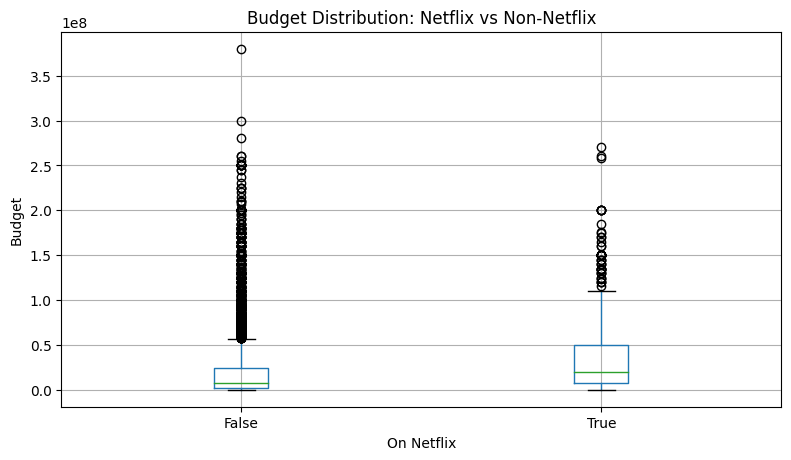

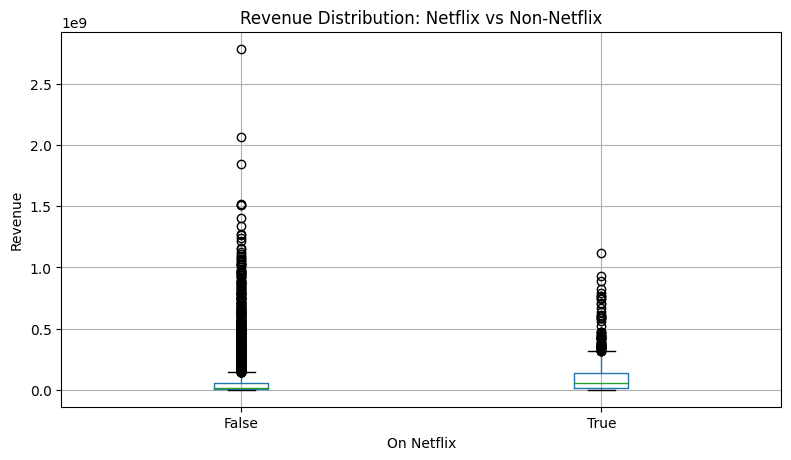

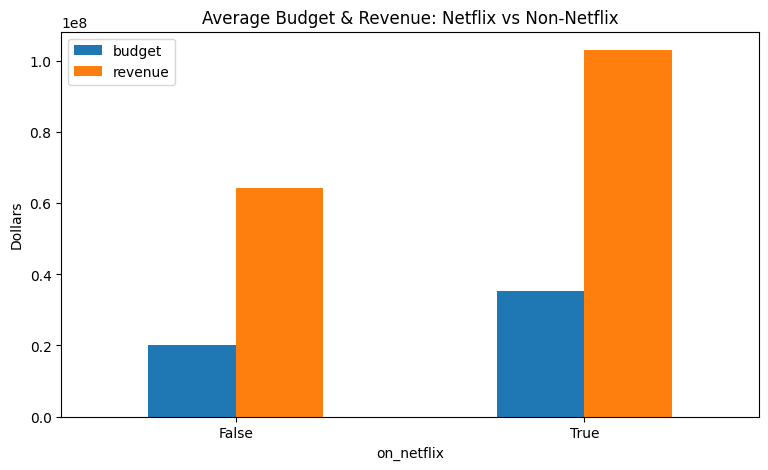

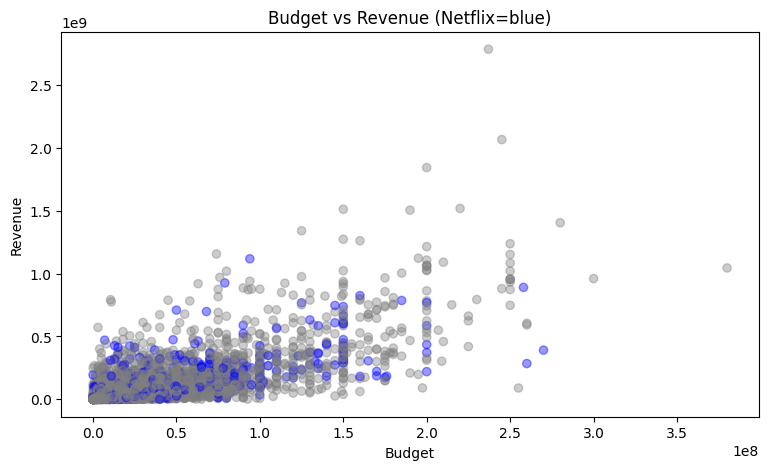

In [28]:
# Summary statistics by on_netflix
summary_stats = final.groupby('on_netflix')[['budget', 'revenue']].describe()
print('\nSummary statistics by Netflix availability:\n', summary_stats)


# %%
# Boxplots for budget and revenue
final.boxplot(column='budget', by='on_netflix')
plt.title('Budget Distribution: Netflix vs Non-Netflix')
plt.suptitle('')
plt.xlabel('On Netflix')
plt.ylabel('Budget')
plt.show()


final.boxplot(column='revenue', by='on_netflix')
plt.title('Revenue Distribution: Netflix vs Non-Netflix')
plt.suptitle('')
plt.xlabel('On Netflix')
plt.ylabel('Revenue')
plt.show()


# %%
# Average values bar chart
avg_values = final.groupby('on_netflix')[['budget', 'revenue']].mean()
ax = avg_values.plot(kind='bar')
ax.set_title('Average Budget & Revenue: Netflix vs Non-Netflix')
ax.set_ylabel('Dollars')
plt.xticks(rotation=0)
plt.show()


# %%
# Scatterplot: budget vs revenue colored by on_netflix
colors = final['on_netflix'].map({True: 'blue', False: 'gray'})
plt.scatter(final['budget'], final['revenue'], alpha=0.4, c=colors)
plt.title('Budget vs Revenue (Netflix=blue)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

1. Netflix movies typically have significantly lower budgets.
Across the dataset, films that appeared on Netflix had much smaller production budgets than theatrical releases. This aligns with Netflix’s focus on mid-budget productions and licensing content rather than producing large-scale blockbusters.

2. Netflix movies also generate lower revenue.
Because many Netflix films release directly to streaming, they do not receive full theatrical box office earnings. As a result, films not on Netflix (especially large studio releases) tend to dominate the high-revenue range.

3. The relationship between budget and revenue is strong for theatrical films but weaker for Netflix content.
Scatterplots show a clear upward trend for non-Netflix movies: bigger budgets typically lead to higher revenue. Netflix movies cluster around lower budgets and revenue levels, showing less variance.

4. Movies on Netflix represent a small portion of the dataset.
The dataset is imbalanced: most movies in The Movies Dataset were not available on Netflix. This imbalance matters when interpreting averages.


## Overall Answer to the Research Question:
Movies available on Netflix generally have lower budgets and earn less revenue compared to movies not available on Netflix.
 Theatrical releases dominate the high-budget, high-earning region, which influences overall averages and visual patterns.


## Limitations:
Missing/incorrect budget or revenue entries in the Movies dataset.
Revenue values represent box office only; Netflix originals may not have theatrical revenue and are therefore under-represented.
Title matching is not perfect (alternate titles, localization) which may cause unmatched rows.

### **5.2:** Reflection
if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

If more time were available, I would:
- Implement fuzzy title matching to improve merge rates 
- Adjust monetary values for inflation to compare across time
- Explore additional datasets (estreaming view metrics, production companies)